In [1]:
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
import os
np.random.seed(0)

In [2]:
if not os.path.exists("plots/"):
    os.mkdir("plots")

In [3]:
At = np.asarray([
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
Bt = np.asarray([
    [0.5, 0.0],
    [0.0, 0.5],
    [1.0, 0.0],
    [0.0, 1.0]
])
Ct = np.asarray([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

In [4]:
sigma_rx = 1.0
sigma_ry = 1.0
sigma_rxdot = 0.01
sigma_rydot = 0.01
dx = 0
dy = 0
sigma_q = 10

def ut():
    return np.asarray([[dx], [dy]])

def R():
    R = np.asarray([
        [sigma_rx**2, 0, 0, 0],
        [0, sigma_ry**2, 0, 0],
        [0, 0, sigma_rxdot**2, 0],
        [0, 0, 0, sigma_rydot**2]
    ])
    return R
    
def Q():
    return np.eye(2)*(sigma_q**2)

In [5]:
def noise(cov):
    return np.random.multivariate_normal(np.zeros(cov.shape[0]), cov).reshape(-1,1)

## Part A

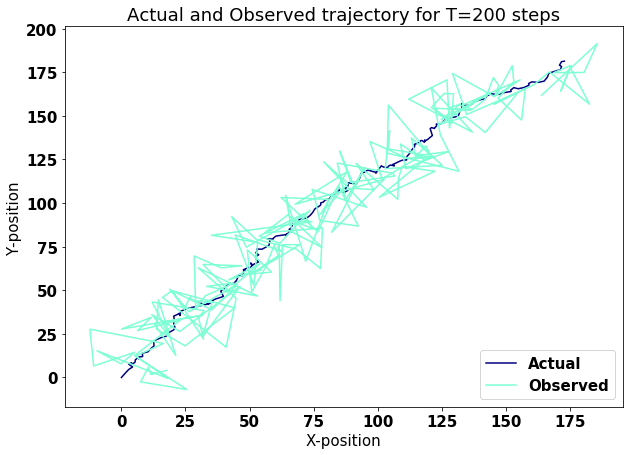

In [6]:
T = 200
initial_x = 0
initial_y = 0
vel_x = 1
vel_y = 1
X = np.asarray([[initial_x],[initial_y],[vel_x],[vel_y]])
actual = [X]
observed = [X[:2, :] + noise(Q())]
for i in range(T):
    X = (At @ X) + noise(R())
    actual.append(X)
    observed.append(X[:2, :] + noise(Q()))
actual = np.asarray(actual)
observed = np.asarray(observed)

fig, ax = plt.subplots(1, 1, figsize =(10, 7))
ax.plot(actual[:, 0, 0], actual[:, 1, 0], label="Actual", color="navy")
ax.plot(observed[:, 0, 0], observed[:, 1, 0], label="Observed", color="aquamarine")

ax.set_title("Actual and Observed trajectory for T="+str(T)+" steps")
ax.set_xlabel("X-position")
ax.set_ylabel("Y-position")
ax.legend(loc='lower right')
fig.savefig("plots/a_trajectory_t_"+str(T)+".png", bbox_inches="tight")
plt.show()

## Part B

In [7]:
def kalman(mu, sigma, u, z):
    mu1 = (At @ mu) + (Bt @ u)
    sigma1 = (At @ sigma @ At.T) + R()
    kt = sigma1 @ Ct.T @ np.linalg.pinv((Ct @ sigma1 @ Ct.T) + Q())
    new_mu = mu1 + (kt @ (z - (Ct @ mu1)))
    new_sigma = (np.eye(sigma1.shape[0]) - (kt @ Ct)) @ sigma1
    return new_mu, new_sigma

## Part C

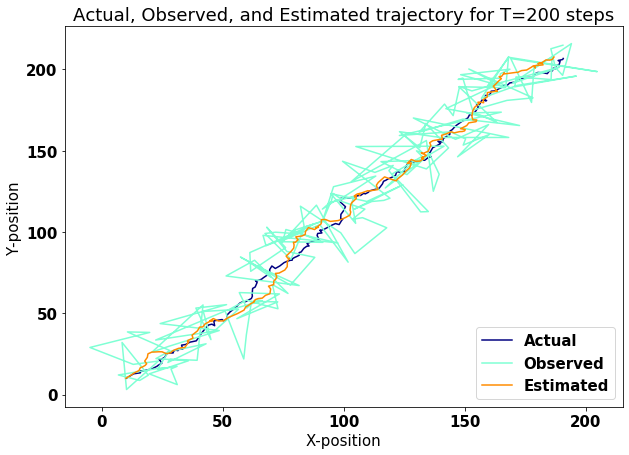

In [8]:
T = 200
initial_x = 10
initial_y = 10
vel_x = 1
vel_y = 1
X = np.asarray([[initial_x],[initial_y],[vel_x],[vel_y]])
mu = X
std = 0.01
sigma = np.eye(mu.shape[0])*(std**2)
actual = [X]
observed = [(Ct @ X) + noise(Q())]
estimated_pos = [mu]
estimated_dev = [sigma]
for i in range(T):
    new_mu, new_sigma = kalman(estimated_pos[-1], estimated_dev[-1], ut(), observed[-1])
    estimated_pos.append(new_mu)
    estimated_dev.append(new_sigma)
    X = (At @ X) + noise(R())
    actual.append(X)
    observed.append((Ct @ X) + noise(Q()))
    
actual = np.asarray(actual)
observed = np.asarray(observed)
estimated_pos = np.asarray(estimated_pos)
estimated_dev = np.asarray(estimated_dev)

fig, ax = plt.subplots(1, 1, figsize =(10, 7))
ax.plot(actual[:, 0, 0], actual[:, 1, 0], label="Actual", color="navy")
ax.plot(observed[:, 0, 0], observed[:, 1, 0], label="Observed", color="aquamarine")
ax.plot(estimated_pos[:, 0, 0], estimated_pos[:, 1, 0], label="Estimated", color="darkorange")

ax.set_title("Actual, Observed, and Estimated trajectory for T="+str(T)+" steps")
ax.set_xlabel("X-position")
ax.set_ylabel("Y-position")
ax.legend(loc='lower right')
fig.savefig("plots/c_trajectory_t_"+str(T)+".png", bbox_inches="tight")
plt.show()

## Part D

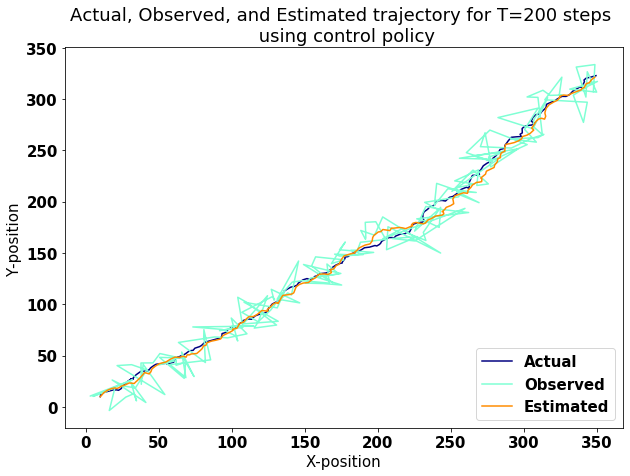

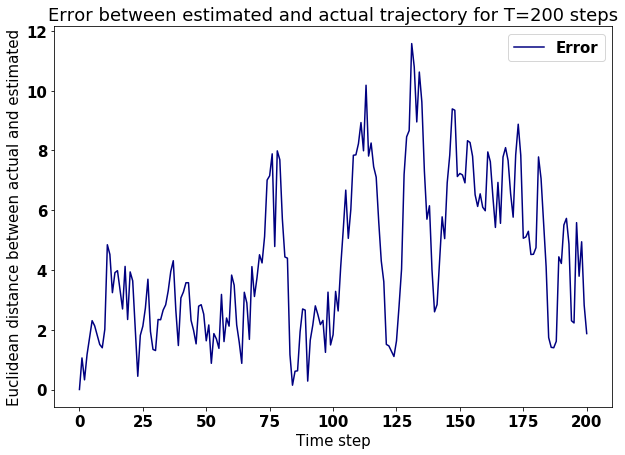

In [9]:
T = 200
initial_x = 10
initial_y = 10
vel_x = 1
vel_y = 1
X = np.asarray([[initial_x],[initial_y],[vel_x],[vel_y]])
mu = X
std = 0.01
sigma = np.eye(mu.shape[0])*(std**2)
actual = [X]
observed = [(Ct @ X) + noise(Q())]
estimated_pos = [mu]
estimated_dev = [sigma]
for i in range(T):
    dx = np.sin(i)
    dy = np.cos(i)
    new_mu, new_sigma = kalman(estimated_pos[-1], estimated_dev[-1], ut(), observed[-1])
    estimated_pos.append(new_mu)
    estimated_dev.append(new_sigma)
    X = (At @ X) + (Bt @ ut()) + noise(R())
    actual.append(X)
    observed.append((Ct @ X) + noise(Q()))
    
actual = np.asarray(actual)
observed = np.asarray(observed)
estimated_pos = np.asarray(estimated_pos)
estimated_dev = np.asarray(estimated_dev)

fig, ax = plt.subplots(1, 1, figsize =(10, 7))
ax.plot(actual[:, 0, 0], actual[:, 1, 0], label="Actual", color="navy")
ax.plot(observed[:, 0, 0], observed[:, 1, 0], label="Observed", color="aquamarine")
ax.plot(estimated_pos[:, 0, 0], estimated_pos[:, 1, 0], label="Estimated", color="darkorange")

ax.set_title("Actual, Observed, and Estimated trajectory for T="+str(T)+" steps \n using control policy")
ax.set_xlabel("X-position")
ax.set_ylabel("Y-position")
ax.legend(loc='lower right')
fig.savefig("plots/d_trajectory_t_"+str(T)+".png", bbox_inches="tight")
plt.show()

error = np.sqrt((estimated_pos[:, 1, 0] - actual[:, 1, 0])**2 + (estimated_pos[:, 0, 0] - actual[:, 0, 0])**2)
xticks = np.arange(len(error))
fig, ax = plt.subplots(1, 1, figsize =(10, 7))
ax.plot(xticks, error, label="Error", color="navy")

ax.set_title("Error between estimated and actual trajectory for T="+str(T)+" steps")
ax.set_ylabel("Euclidean distance between actual and estimated")
ax.set_xlabel("Time step")
ax.legend(loc='upper right')
fig.savefig("plots/d_error_t_"+str(T)+".png", bbox_inches="tight")
plt.show()

## Part E

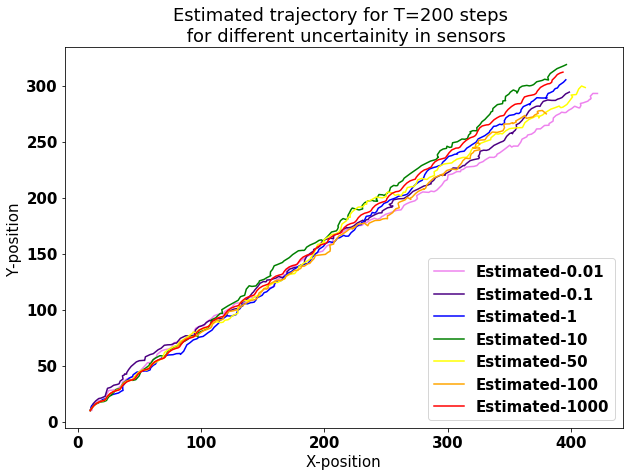

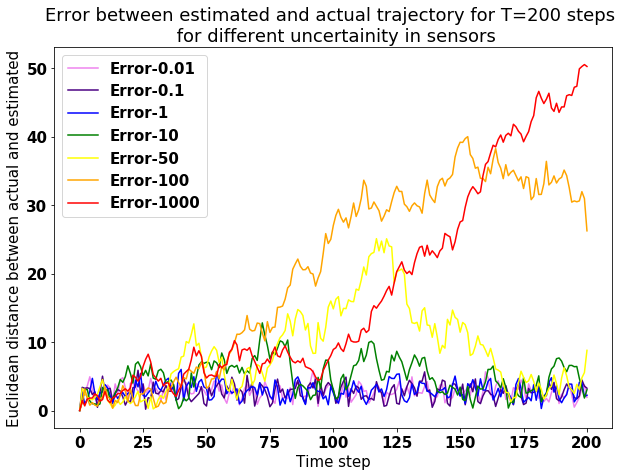

In [13]:
fig, ax = plt.subplots(1, 1, figsize =(10, 7))
fig2, ax2 = plt.subplots(1, 1, figsize =(10, 7))
sigmas = [0.01, 0.1, 1, 10, 50, 100, 1000]
colors = ["violet", "indigo", "blue", "green", "yellow", "orange", "red"]
for n in range(len(sigmas)):
    sigma_q = sigmas[n]
    T = 200
    initial_x = 10
    initial_y = 10
    vel_x = 1
    vel_y = 1
    X = np.asarray([[initial_x],[initial_y],[vel_x],[vel_y]])
    actual = [X]
    mu = X
    std = 0.01
    sigma = np.eye(mu.shape[0])*(std**2)
    observed = [(Ct @ X) + noise(Q())]
    estimated_pos = [mu]
    estimated_dev = [sigma]
    for i in range(T):
        dx = np.sin(i)
        dy = np.cos(i)
        new_mu, new_sigma = kalman(estimated_pos[-1], estimated_dev[-1], ut(), observed[-1])
        estimated_pos.append(new_mu)
        estimated_dev.append(new_sigma)
        X = (At @ X) + (Bt @ ut()) + noise(R())
        actual.append(X)
        observed.append((Ct @ X) + noise(Q()))

    estimated_pos = np.asarray(estimated_pos)
    actual = np.asarray(actual)
    
    ax.plot(estimated_pos[:, 0, 0], estimated_pos[:, 1, 0], label="Estimated-"+str(sigma_q), color=colors[n])
    error = np.sqrt((estimated_pos[:, 1, 0] - actual[:, 1, 0])**2 + (estimated_pos[:, 0, 0] - actual[:, 0, 0])**2)
    xticks = np.arange(len(error))
    ax2.plot(xticks, error, label="Error-"+str(sigma_q), color=colors[n])

ax.set_title("Estimated trajectory for T="+str(T)+" steps \n for different uncertainity in sensors")
ax.set_xlabel("X-position")
ax.set_ylabel("Y-position")
ax.legend(loc='lower right')
fig.savefig("plots/e_trajectory_t_"+str(T)+".png", bbox_inches="tight")

ax2.set_title("Error between estimated and actual trajectory for T="+str(T)+" steps \n for different uncertainity in sensors")
ax2.set_ylabel("Euclidean distance between actual and estimated")
ax2.set_xlabel("Time step")
ax2.legend(loc='upper left')
fig2.savefig("plots/e_error_t_"+str(T)+".png", bbox_inches="tight")
plt.show()